### Part 10 - Cleaning up Notebook

In [42]:
# Step 1: Import libraries and configure styling

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import sklearn
from sklearn.mixture import GaussianMixture

plt.style.use('seaborn')
%matplotlib inline

### Get Data

In [43]:
# Step 2: Get the data from the package

from jworkflow_pkg.data import get_bdata
bdata = get_bdata()

In [44]:
# Step 3: Conduct Pivot Table on Data

pivoted = bdata.pivot_table('Total', index=bdata.index.time, columns=bdata.index.date)

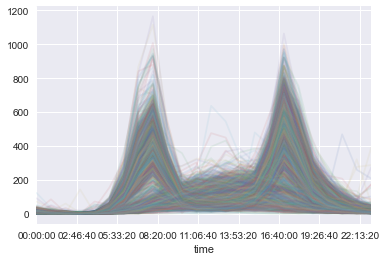

In [45]:
# Step 4: Plot pivot table data
## Here we see the data doesn't have the two peaks, but instead just one...This is what we need to fix

pivoted.plot(legend=False, alpha=0.1)

### Principal Component Analysis (PCA)

In [46]:
# Step 6: Convert pivoted into numpy array
## Use fillna(0) to fill in missing data

X = pivoted.fillna(0).T.values
X.shape

(2036, 24)

In [47]:
# Step 7: Try fitting the two-dimensional X value and Review the two-dimensional array created from the PCA

X2 = PCA(2).fit_transform(X)
X2.shape

(2036, 2)

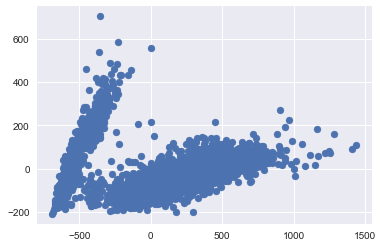

In [48]:
### Step 8: Create a scatter plot to compare the two data sets

## The clusters suggests 2 unique type of days

plt.scatter(X2[:, 0], X2[:,1])

### Unsupervised Clustering

In [49]:
### Step 9: Import Gaussian Mixture model to investigate the PCA plot

## Specify 2 -> for two clusters
## The labels will identify if we are in the 0 or 1 cluster

gmm = GaussianMixture(2).fit(X)
labels = gmm.predict(X)

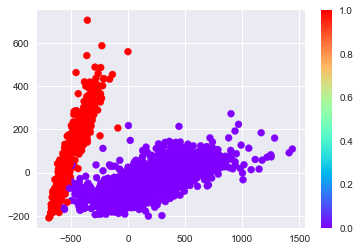

In [50]:
### Step 10: Reproduce the scatter plot with divider of labels
## Provides clear separation of clusters

plt.scatter(X2[:, 0], X2[:,1], c=labels, cmap='rainbow')
plt.colorbar()

Text(0.5,1,'Purple Cluster')

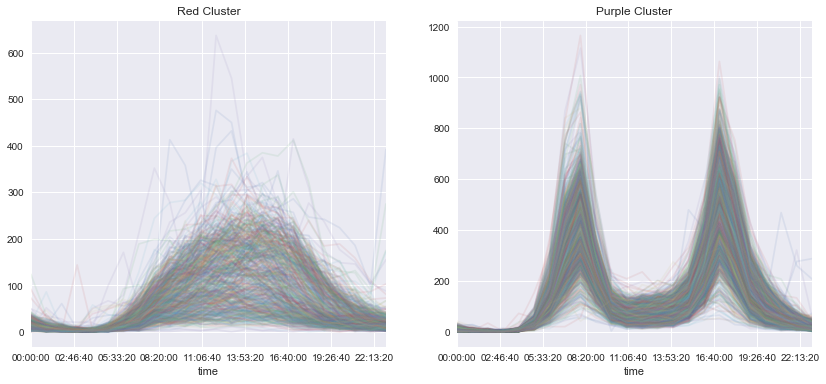

In [51]:
### Step 11: Dissect just a portion of the data
## The red cluster has a high peak commuter pattern displayed (Commute days)
## The purple cluster has a more even distribution (Non-commute days)

fig, ax = plt.subplots(1 ,2 , figsize=(14,6))

pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1, ax=ax[0])
pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1, ax=ax[1])

ax[0].set_title('Red Cluster')
ax[1].set_title('Purple Cluster')

### Compare with Day of the Week




In [52]:
### Step 12: Use the day of week attribure of the datetime64 object 

dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

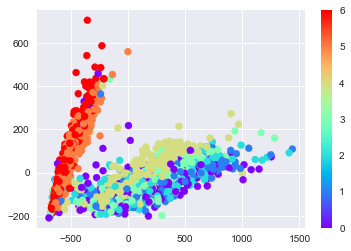

In [53]:
### Step 13: Plot the graph with day of week as coloration

plt.scatter(X2[:, 0], X2[:,1], c=dayofweek, cmap='rainbow')
plt.colorbar()

### Analyzing Outliers

In [54]:
### Step 14: Look deeper into the data for non-weekdays that look like non-commute days
## We see the a pattern of mostly holidays


dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 0) & (dayofweek < 5)]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20',
               '2018-04-23', '2018-04-24', '2018-04-25', '2018-04-26',
               '2018-04-27', '2018-04-30'],
              dtype='datetime64[ns]', length=1405, freq=None)